In [8]:
from templateobs import *

# Exercise 2
## Exercise 2.1

In [9]:
def sup(D, X, Y=None):
    count_XY = sum(1 for transaction in D if set(X).issubset(transaction) and (set(Y).issubset(transaction) if Y else True))
    return count_XY / len(D)

def conf(D, X, Y):
    count_X = sum(1 for transaction in D if set(X).issubset(transaction))
    count_XY = sum(1 for transaction in D if set(X).issubset(transaction) and set(Y).issubset(transaction))
    return count_XY / count_X if count_X != 0 else 0

def lift(D, X, Y=None):
    sup_X = sup(D, X)
    sup_Y = sup(D, Y) if Y else sup_X
    sup_XY = sup(D, X, Y)
    return sup_XY / (sup_X * sup_Y) if (sup_X * sup_Y) != 0 else 0

def leverage(D, X, Y):
    sup_XY = sup(D, X, Y)
    sup_X = sup(D, X)
    sup_Y = sup(D, Y)
    return sup_XY - (sup_X * sup_Y)

def jaccard(D, X, Y):
    count_XY = sum(1 for transaction in D if set(X).issubset(transaction) and set(Y).issubset(transaction))
    count_X = sum(1 for transaction in D if set(X).issubset(transaction))
    count_Y = sum(1 for transaction in D if set(Y).issubset(transaction))
    return count_XY / (count_X + count_Y - count_XY) if (count_X + count_Y - count_XY) != 0 else 0

def conviction(D, X, Y):
    conf_XY = conf(D, X, Y)
    sup_Y = sup(D, Y)
    return (1 - sup_Y) / (1 - conf_XY) if (1 - conf_XY) != 0 else float('inf')

def oddsRatio(D, X, Y):
    count_XY = sum(1 for transaction in D if set(X).issubset(transaction) and set(Y).issubset(transaction))
    count_X_not_Y = sum(1 for transaction in D if set(X).issubset(transaction) and not set(Y).issubset(transaction))
    count_not_X_Y = sum(1 for transaction in D if not set(X).issubset(transaction) and set(Y).issubset(transaction))
    count_not_X_not_Y = sum(1 for transaction in D if not set(X).issubset(transaction) and not set(Y).issubset(transaction))
    return (count_XY * count_not_X_not_Y) / (count_X_not_Y * count_not_X_Y) if (count_X_not_Y * count_not_X_Y) != 0 else 0


def imp(D, X, Y):
    conf_XY = conf(D, X, Y)
    max_conf = 0
    subsets = [list(s) for i in range(1, len(X)) for s in itertools.combinations(X, i)]
    for subset in subsets:
        conf_subset_Y = conf(D, subset, Y)
        if conf_subset_Y > max_conf:
            max_conf = conf_subset_Y
    
    return conf_XY - max_conf

def getRuleMetric(D, X, Y, metric):
    metrics = {
        'sup': sup(D, X, Y),
        'conf': conf(D, X, Y),
        'lift': lift(D, X, Y),
        'leverage': leverage(D, X, Y),
        'jaccard': jaccard(D, X, Y),
        'conviction': conviction(D, X, Y),
        'oddsratio': oddsRatio(D, X, Y),
        'imp': imp(D, X, Y)
    }
    return metrics[metric]


In [10]:
def testMetric(metric, D, X, Y, ex):
    exString = str(ex)
    dotIndex = exString.find(".")
    floatPos = len(exString) - dotIndex - 1 if dotIndex >= 0 else 0
    actOrig = getRuleMetric(D, X, Y, metric)
    try:
        act = np.round(actOrig, floatPos)
    except:
        print("PROBLEM WITH " + str(actOrig))
    print (("OK    " if act == ex else "FAIL  ") + metric + "(" + "".join([str(x) for x in X]) + " -> " + "".join([str(x) for x in Y]) + ")" + (("Expected: " + str(ex) + " but was " + str(act))  if act != ex else ""))

def testMetrics():
    D = read_database("exampleset_numeric.dat")
    testMetric("conf", D, [1], [5], 1)
    testMetric("conf", D, [5], [1], 0.8)
    testMetric("conf", D, [2], [5], 0.83)
    testMetric("conf", D, [5], [2], 1)
    testMetric("conf", D, [5], [2, 3], 0.6)
    testMetric("conf", D, [2, 3], [5], 0.75)
    testMetric("lift", D, [1], [2], 1)
    testMetric("lift", D, [1], [3], 0.75)
    testMetric("lift", D, [1], [5], 1.2)
    testMetric("leverage", D, [1], [5], 0.11)
    testMetric("lift", D, [1, 3, 4], [5], 1.2)
    testMetric("leverage", D, [1, 3, 4], [5], 0.03)
    testMetric("jaccard", D, [1], [5], 0.8)
    testMetric("jaccard", D, [1], [2], 0.67)
    testMetric("jaccard", D, [1], [3], 0.33)
    testMetric("conviction", D, [1], [4,5], 2)
    testMetric("conviction", D, [5], [3], 0.83)
    testMetric("conviction", D, [3], [5], 0.67)
    testMetric("conviction", D, [4, 5], [1], np.inf)
    testMetric("oddsratio", D, [1], [3], 0)
    testMetric("oddsratio", D, [1], [4], 3)
    testMetric("imp", D, [2, 5], [3], -0.07)
    testMetric("imp", D, [2, 3], [5], -0.08)
    testMetric("imp", D, [3, 5], [2], 0.0)
    testMetric("imp", D, [4, 5], [1], 0.2)

testMetrics()

OK    conf(1 -> 5)
OK    conf(5 -> 1)
OK    conf(2 -> 5)
OK    conf(5 -> 2)
OK    conf(5 -> 23)
OK    conf(23 -> 5)
OK    lift(1 -> 2)
OK    lift(1 -> 3)
OK    lift(1 -> 5)
OK    leverage(1 -> 5)
OK    lift(134 -> 5)
OK    leverage(134 -> 5)
OK    jaccard(1 -> 5)
OK    jaccard(1 -> 2)
OK    jaccard(1 -> 3)
OK    conviction(1 -> 45)
OK    conviction(5 -> 3)
OK    conviction(3 -> 5)
OK    conviction(45 -> 1)
OK    oddsratio(1 -> 3)
OK    oddsratio(1 -> 4)
OK    imp(25 -> 3)
OK    imp(23 -> 5)
OK    imp(35 -> 2)
OK    imp(45 -> 1)


## Exercise 2.2

In [111]:
from itertools import chain, combinations
def filterProductiveRules(D, R):
    p_rules = []
    for rule in R:
        X, Y, sup_XY, conf_X_Y = rule
        max_conf = 0
        for subset in chain.from_iterable(combinations(X, r) for r in range(len(X))):
            if subset != X and conf(D, subset, Y) > max_conf:
                max_conf = conf(D, subset, Y)
        if conf_X_Y > max_conf:
            p_rules.append(rule)
    return p_rules

In [112]:
def test_set_equalness(exp, act):
    length_exp = len(exp)
    length_act = len(act)
    print("Length of collection: " + str("OK" if length_exp == length_act else "FAILED, expected length " + str(length_exp) + " but saw " + str(length_act)))
    obsolete = [f for f in act if not f in exp]
    missing = [f for f in exp if not f in act]
    if obsolete:
        print("Found unexpected entries: " + str(obsolete))
        return False
    if missing:
        print("Missing entries: " + str(missing))
        return False
    return True
        
def testFilter():
    D = read_database("exampleset_numeric.dat")
    R = getStrongRules(D, 3, 1.0)
    RF_act = filterProductiveRules(D, R)
    for r in RF_act:
        if type(r) != tuple:
            print("Element in reduced rule set is not a tuple: " + str(r))
            return
        if len(r) != 4:
            print("Length of tuple is not 4: " + str(r))
            return
    
    RF_exp = [([4, 5], [1, 2], 3, 1.0), ([1], [2, 5], 4, 1.0), ([4, 5], [1], 3, 1.0), ([1], [5], 4, 1.0)]
    equal = test_set_equalness(RF_exp, RF_act)
    print("Filter test: " + ("OK" if equal else "FAILED"))
    
testFilter()

Length of collection: OK
Filter test: OK


## Exercise 2.3
no tests for this exercise

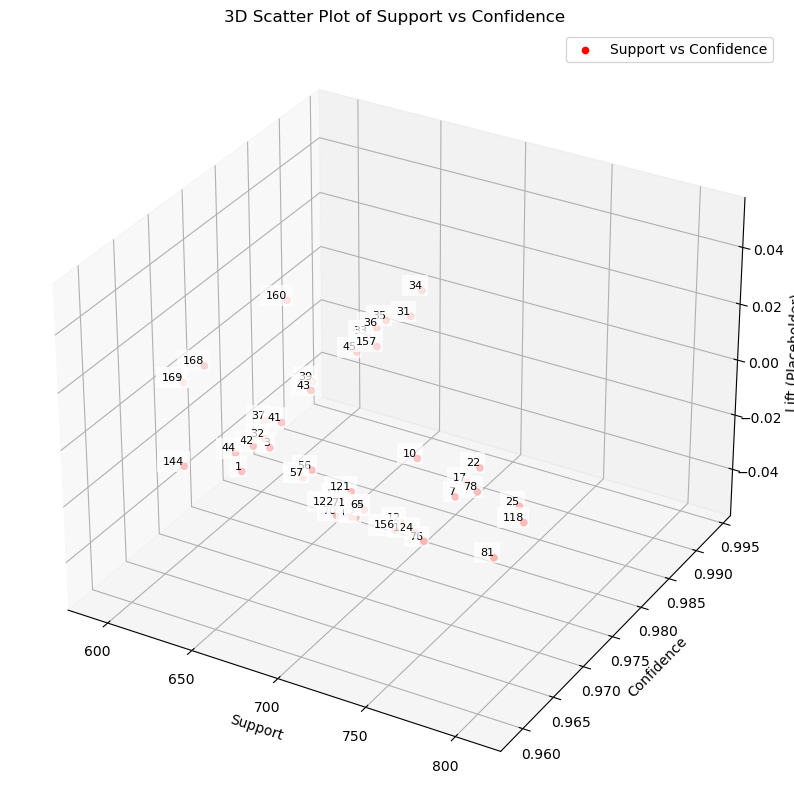

In [13]:
from templateobs import read_database, getStrongRules
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the database
database = read_database("shop.dat")

# Mine strong rules
R = getStrongRules(database, 500, 0.95)

# Create DataFrame
df = pd.DataFrame(R, columns=['X', 'Y', 'support', 'confidence'])
df['id'] = range(len(df))  # Assign an ID to each rule for labeling

# Filter for productive rules
median_support = df['support'].median()
median_confidence = df['confidence'].median()
filtered_df = df[(df['support'] > median_support) & (df['confidence'] > median_confidence)]

# Plotting
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(filtered_df['support'], filtered_df['confidence'], np.zeros(len(filtered_df)), c='r', label='Support vs Confidence')

ax.set_xlabel('Support')
ax.set_ylabel('Confidence')
ax.set_zlabel('Lift (Placeholder)')
ax.set_title('3D Scatter Plot of Support vs Confidence')

# Improve text visibility
for i, txt in enumerate(filtered_df['id']):
    ax.text(filtered_df['support'].iloc[i], filtered_df['confidence'].iloc[i], 0, f'{txt}', color='black', size=8, 
            ha='right', va='bottom', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.legend()
plt.show()


Regla 168: ubicada en el extremo superior del rango de soporte, esta regla representa un patrón que ocurre con frecuencia dentro del conjunto de datos. Su posición sugiere un alto grado de ocurrencia, lo que lo hace significativo simplemente porque captura un patrón o relación común dentro de los datos. puede representar una tendencia fuerte y observable que podría influir en cualquier interpretación o decisión basada en el comportamiento general del conjunto de datos.

Regla 34: esta regla también se ubica en el extremo superior tanto de apoyo como de confianza, lo que indica que no sólo ocurre con frecuencia sino que también tiene una gran confiabilidad predictiva. Esta regla es particularmente valiosa en el análisis de datos porque es un patrón común y confiable, lo que garantiza que no sea solo una coincidencia frecuente sino una relación confiable.

Regla 81: Destacada por su posición equilibrada en ambas métricas, esta regla no es la más alta en apoyo ni confianza, pero mantiene una fuerte presencia en el rango medio a superior de ambos. Esto sugiere una regla observada consistentemente que es lo suficientemente confiable como para ser considerada significativa pero no dominante. Destaca un patrón estable y moderadamente confiable, útil en escenarios donde los extremos son menos importantes que la confiabilidad constante.

Regla 160 - Se destaca por su alto apoyo, indicando ocurrencia frecuente. Aunque su confianza no es tan alta como la de otras, la frecuencia con la que ocurre esta regla la convierte en un patrón clave dentro del conjunto de datos. Estas reglas son útiles para identificar comportamientos o atributos comunes que no son necesariamente predictivos pero sí característicos del conjunto de datos.

Regla 157: esta regla se encuentra en una zona de confianza y apoyo moderadamente altos, lo que indica que es un patrón observado con frecuencia y razonablemente confiable. Se destaca por representar una relación confiable y bien respaldada, lo que la convierte en una regla sólida para consideraciones en las que tanto la ocurrencia como la previsibilidad se valoran moderadamente.